In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [3]:
salary= pd.read_csv('SalaryData_Train(1).csv')

In [4]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary.shape

(30161, 14)

In [8]:
import matplotlib.pyplot as plt

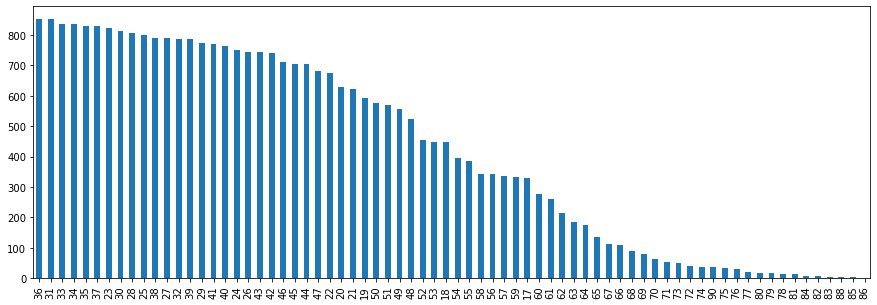

In [9]:
plt.figure(figsize=(15,5))
salary.age.value_counts().plot.bar();

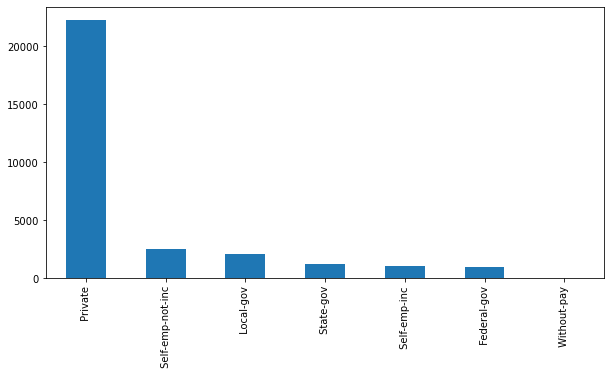

In [10]:
plt.figure(figsize=(10,5))
salary.workclass.value_counts().plot.bar();

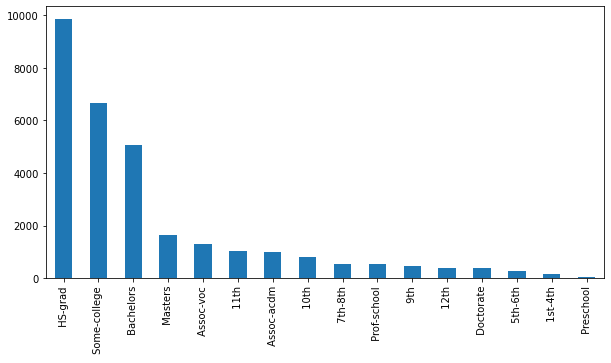

In [11]:
plt.figure(figsize=(10,5))
salary.education.value_counts().plot.bar();

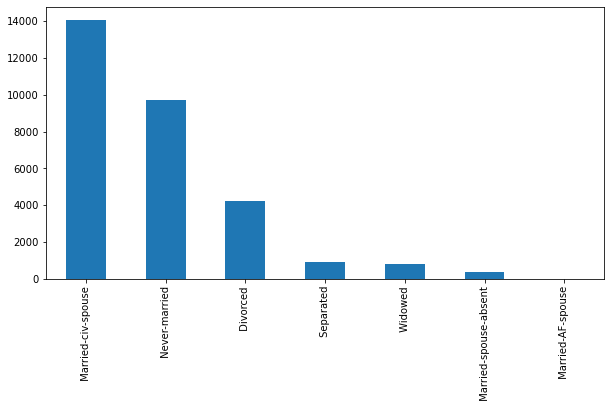

In [12]:
plt.figure(figsize=(10,5))
salary.maritalstatus.value_counts().plot.bar();

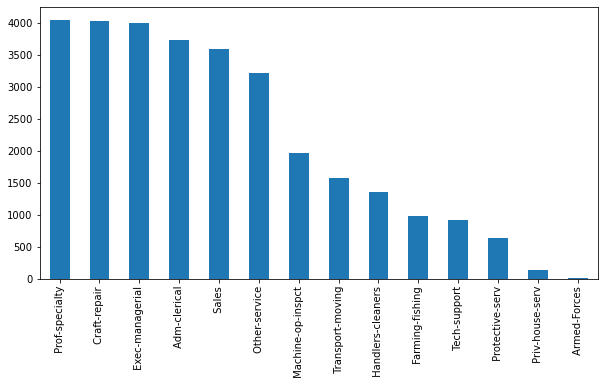

In [13]:
plt.figure(figsize=(10,5))
salary.occupation.value_counts().plot.bar();

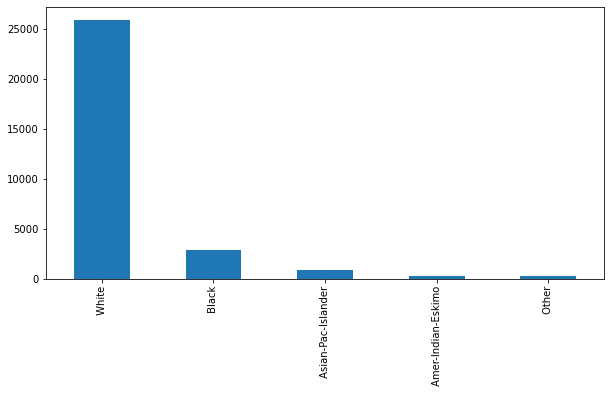

In [14]:
plt.figure(figsize=(10,5))
salary.race.value_counts().plot.bar();

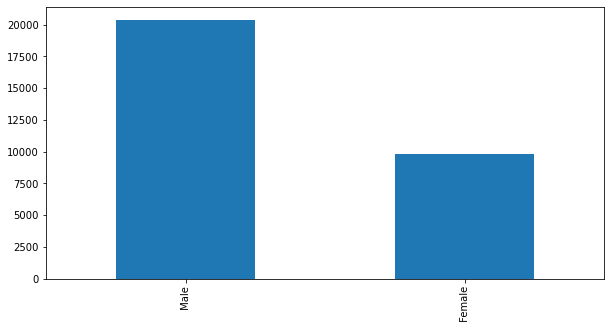

In [15]:
plt.figure(figsize=(10,5))
salary.sex.value_counts().plot.bar();

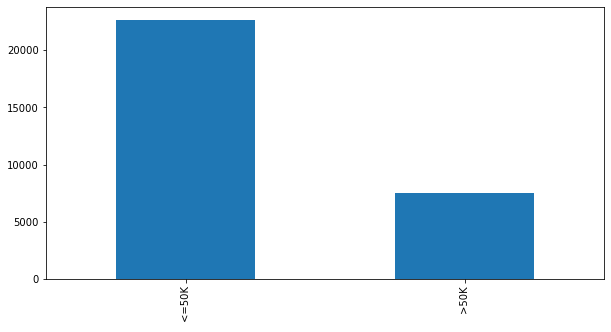

In [16]:
plt.figure(figsize=(10,5))
salary.Salary.value_counts().plot.bar();

In [17]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()

In [18]:
salary['sex'] = lable_encoder.fit_transform(salary.sex)

In [19]:
salary['Salary'] = lable_encoder.fit_transform(salary.Salary)

In [20]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [21]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [22]:
sal_data=pd.get_dummies(data=salary, columns=['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship','race','native'])

In [23]:
sal_data.head()

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
sal_data.columns

Index(['age', 'educationno', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'Salary', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private',
       ...
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],
      dtype='object', length=102)

In [25]:
S= sal_data.columns.get_loc('Salary')

In [26]:
S

6

In [27]:
cols= list(sal_data.columns.values)

In [28]:
cols

['age',
 'educationno',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'Salary',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-manager

In [29]:
sal_data[['age',
 'educationno',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ Husband',
 'relationship_ Not-in-family',
 'relationship_ Other-relative',
 'relationship_ Own-child',
 'relationship_ Unmarried',
 'relationship_ Wife',
 'race_ Amer-Indian-Eskimo',
 'race_ Asian-Pac-Islander',
 'race_ Black',
 'race_ Other',
 'race_ White',
 'native_ Cambodia',
 'native_ Canada',
 'native_ China',
 'native_ Columbia',
 'native_ Cuba',
 'native_ Dominican-Republic',
 'native_ Ecuador',
 'native_ El-Salvador',
 'native_ England',
 'native_ France',
 'native_ Germany',
 'native_ Greece',
 'native_ Guatemala',
 'native_ Haiti',
 'native_ Honduras',
 'native_ Hong',
 'native_ Hungary',
 'native_ India',
 'native_ Iran',
 'native_ Ireland',
 'native_ Italy',
 'native_ Jamaica',
 'native_ Japan',
 'native_ Laos',
 'native_ Mexico',
 'native_ Nicaragua',
 'native_ Outlying-US(Guam-USVI-etc)',
 'native_ Peru',
 'native_ Philippines',
 'native_ Poland',
 'native_ Portugal',
 'native_ Puerto-Rico',
 'native_ Scotland',
 'native_ South',
 'native_ Taiwan',
 'native_ Thailand',
 'native_ Trinadad&Tobago',
 'native_ United-States',
 'native_ Vietnam',
 'native_ Yugoslavia','Salary']]

,age,educationno,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,0,38,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,1,0,0,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
sal_data.shape

(30161, 102)

In [31]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Columns: 102 entries, age to native_ Yugoslavia
dtypes: int32(2), int64(5), uint8(95)
memory usage: 4.1 MB


In [32]:
pd.isnull('sal_data')

False

In [33]:
array = sal_data.values

In [34]:
X = array[:,0:101]
Y = array[:,101]

In [35]:
Y.shape

(30161,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state= 300)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21112, 101), (21112,), (9049, 101), (9049,))

In [38]:
help(SVC)
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

SVC(kernel='linear')

In [39]:
pred_test_linear = model_linear.predict(X_test)

In [40]:
np.mean(pred_test_linear==y_test)

0.9991159244115372

In [41]:
acc = accuracy_score(y_test, pred_test_linear) * 100

In [42]:
acc

99.91159244115372

In [43]:
confusion_matrix(y_test, pred_test_linear)

array([[9041,    0],
       [   8,    0]], dtype=int64)

In [44]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

In [45]:
np.mean(pred_test_poly==y_test)

0.9991159244115372

In [46]:
acc = accuracy_score(y_test, pred_test_poly) * 100

In [47]:
print("Accuracy =", acc)

Accuracy = 99.91159244115372


In [48]:
confusion_matrix(y_test, pred_test_poly)

array([[9041,    0],
       [   8,    0]], dtype=int64)

In [ ]:
for new test data

In [52]:
test= pd.read_csv('SalaryData_Test(1).csv')

In [53]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [54]:
test.shape

(15060, 14)

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


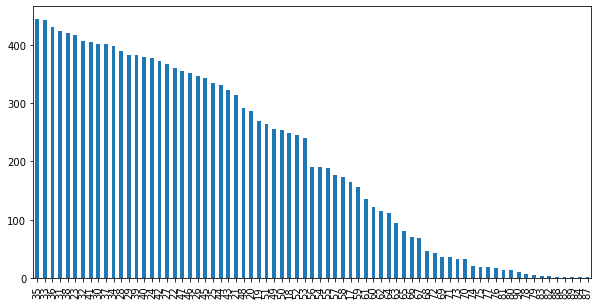

In [56]:
plt.figure(figsize=(10,5))
test.age.value_counts().plot.bar();

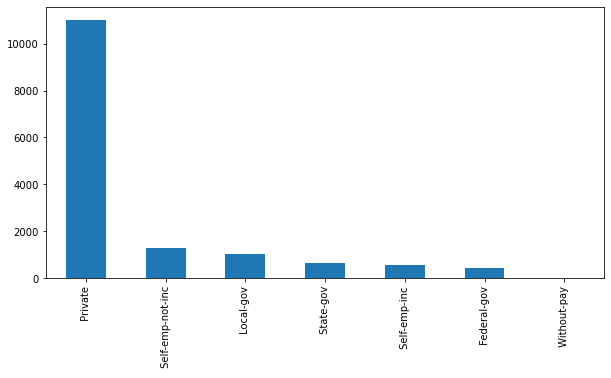

In [57]:
plt.figure(figsize=(10,5))
test.workclass.value_counts().plot.bar();

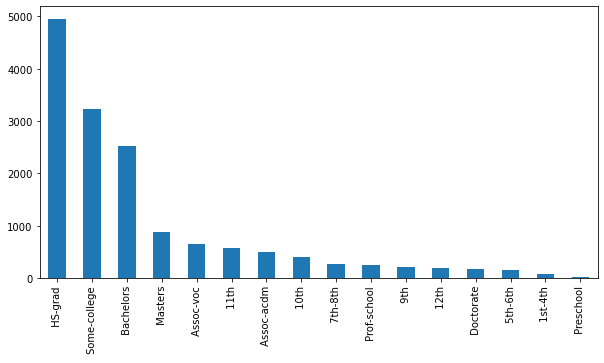

In [58]:
plt.figure(figsize=(10,5))
test.education.value_counts().plot.bar();

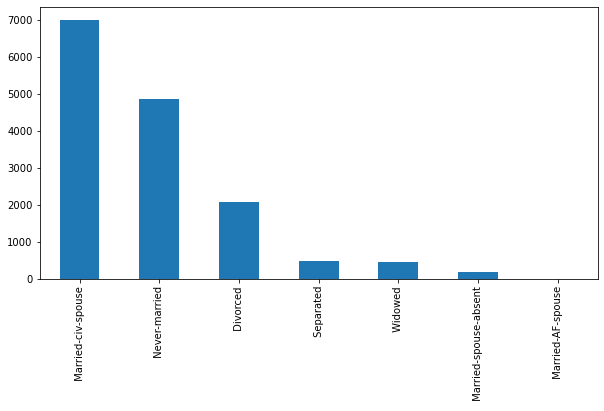

In [59]:
plt.figure(figsize=(10,5))
test.maritalstatus.value_counts().plot.bar();

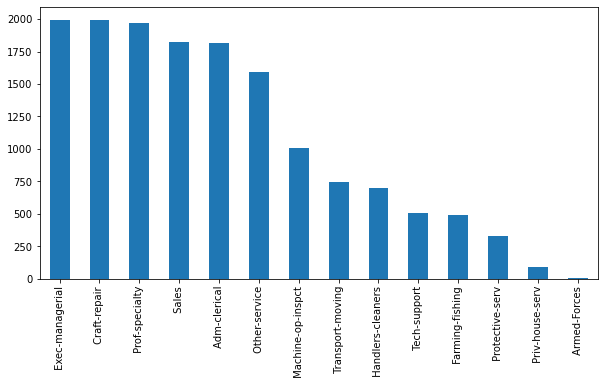

In [61]:
plt.figure(figsize=(10,5))
test.occupation.value_counts().plot.bar();

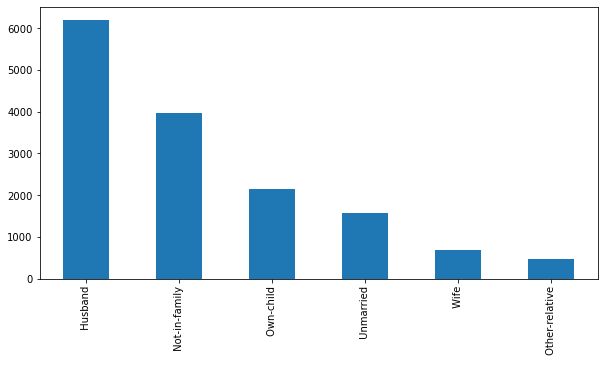

In [62]:
plt.figure(figsize=(10,5))
test.relationship.value_counts().plot.bar();

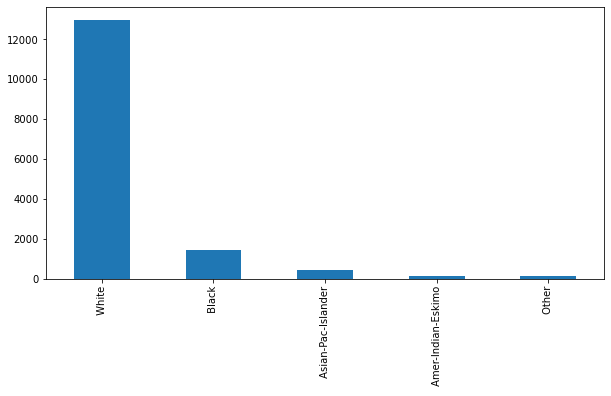

In [63]:
plt.figure(figsize=(10,5))
test.race.value_counts().plot.bar();

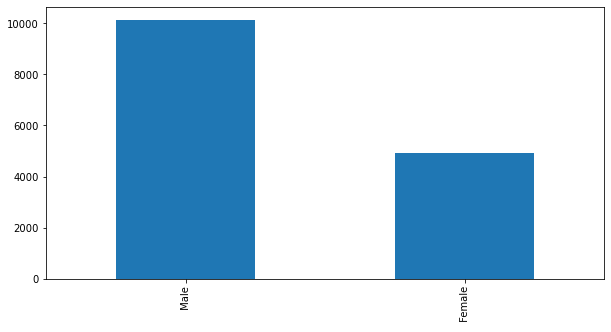

In [64]:
plt.figure(figsize=(10,5))
test.sex.value_counts().plot.bar();

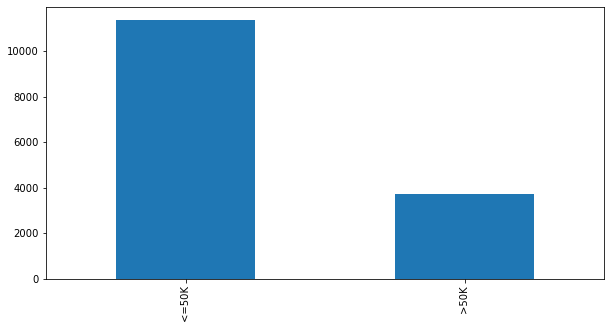

In [65]:
plt.figure(figsize=(10,5))
test.Salary.value_counts().plot.bar();

In [66]:
test['sex'] = lable_encoder.fit_transform(test.sex)

In [67]:
test['Salary'] = lable_encoder.fit_transform(test.Salary)

In [68]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


In [69]:
test_x = test.iloc[:,0:13]
test_y =test.iloc[:,13]

In [70]:
test_x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States


In [71]:
test_x = pd.get_dummies(test_x)

In [72]:
test_x= test_x.values

In [73]:
test_y=test_y.values

In [74]:
pred_test_y = model_poly.predict(test_x)

In [75]:
pred_test_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
np.mean(pred_test_y==test_y)

0.7543160690571049

In [77]:
acc = accuracy_score(test_y, pred_test_y) * 100

In [78]:
acc

75.4316069057105

In [79]:
confusion_matrix(test_y, pred_test_y)

array([[11360,     0],
       [ 3700,     0]], dtype=int64)